In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
import torch
import torch.nn as nn
torch.manual_seed(2)

import sys
from google.colab import drive

from torch.distributions import Normal
from typing import List
from tqdm import tqdm
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

drive.mount('/content/drive')
sys.path.append('drive/MyDrive/ATML_HT22')
from models2 import FlowModule
%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


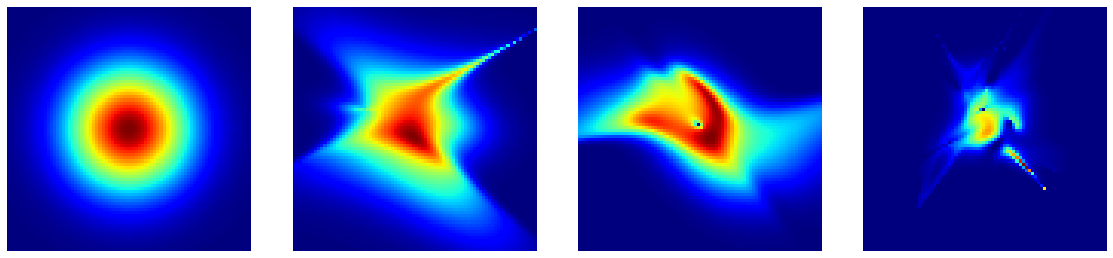

In [32]:
# Normal Distribtuion
N = 80
fig, axes  =plt.subplots(1,4, figsize=(16,4))
fig.tight_layout()

RANGE = 4.
axis_min_max=np.array([[-RANGE, RANGE], [-RANGE, RANGE]])

x1, x2 = np.meshgrid(np.linspace(axis_min_max[0][0],axis_min_max[0][1], N), np.linspace(axis_min_max[1][0],axis_min_max[1][1], N))

tx1 = torch.from_numpy(x1).view(-1)
tx2 = torch.from_numpy(x2).view(-1)
tx = torch.stack([tx1, tx2]).T

density = torch.exp(torch.mean(Normal(0., 1.).log_prob(tx), 1))
axes[0].imshow(density.view(N, N),extent=[axis_min_max[0][0],axis_min_max[0][1],axis_min_max[1][0],axis_min_max[1][1]], cmap='jet')
axes[0].axis('off')

flow_type='PlanarV2'
latent_dim = 2

scale = 1
new_N = N*scale
new_axis_min_max=np.array([[-RANGE, RANGE], [-RANGE, RANGE]])*scale

for i, K in enumerate([1, 2, 10]):
    model = FlowModule(latent_dim, num_layers=K, flow_type=flow_type, encoder_out_dim=2)

    x1_, x2_ = np.meshgrid(np.linspace(new_axis_min_max[0][0],new_axis_min_max[0][1], new_N), np.linspace(new_axis_min_max[1][0],new_axis_min_max[1][1], new_N))
    tx1_ = torch.from_numpy(x1_).view(-1)
    tx2_ = torch.from_numpy(x2_).view(-1)
    tx_ = torch.stack([tx1_, tx2_]).T.type(torch.FloatTensor).to(DEVICE)

    with torch.no_grad():
        new_tx, log_det_sum = model(tx_.type(torch.FloatTensor))

    new_density = torch.exp(torch.mean(Normal(0., 1.).log_prob(new_tx), 1) - log_det_sum.view(-1))

    j = i + 1
    # axes[j].pcolormesh(new_tx[:,0].detach().cpu().numpy().reshape(new_N,new_N), -1*new_tx[:,1].detach().cpu().numpy().reshape(new_N,new_N), new_density.detach().cpu().numpy().reshape(new_N,new_N), rasterized=True, cmap =cm.jet)
    axes[j].imshow(new_density.view(N, N), cmap='jet')
    # axes[j].set_xlim(axis_min_max[0][0],axis_min_max[0][1])
    # axes[j].set_ylim(axis_min_max[1][0],axis_min_max[1][1])
    axes[j].set_aspect(1)
    axes[j].axis('off')
plt.show()

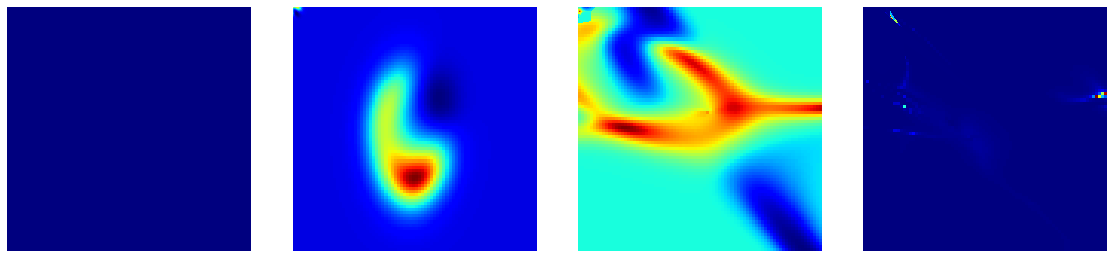

In [52]:
# ~# Uniform Distribtuion
N = 80
fig, axes =plt.subplots(1,4, figsize=(16,4))
fig.tight_layout()

RANGE = 4.
axis_min_max=np.array([[-RANGE, RANGE], [-RANGE, RANGE]])

x1, x2 = np.meshgrid(np.linspace(axis_min_max[0][0],axis_min_max[0][1], N), np.linspace(axis_min_max[1][0],axis_min_max[1][1], N))

tx1 = torch.from_numpy(x1).view(-1)
tx2 = torch.from_numpy(x2).view(-1)
tx = torch.stack([tx1, tx2]).T

density = torch.mean(torch.ones_like(tx), 1)/tx.shape[0]
axes[0].imshow(density.view(N, N),extent=[axis_min_max[0][0],axis_min_max[0][1],axis_min_max[1][0],axis_min_max[1][1]], cmap='jet')
axes[0].axis('off')

flow_type='PlanarV2'
latent_dim =2

scale = 1
new_N = N*scale
new_axis_min_max=np.array([[-RANGE, RANGE], [-RANGE, RANGE]])*scale

for i, K in enumerate([1, 2, 10]):
    model = FlowModule(latent_dim, num_layers=K, flow_type=flow_type, encoder_out_dim=2)

    x1_, x2_ = np.meshgrid(np.linspace(new_axis_min_max[0][0],new_axis_min_max[0][1], new_N), np.linspace(new_axis_min_max[1][0],new_axis_min_max[1][1], new_N))
    tx1_ = torch.from_numpy(x1_).view(-1)
    tx2_ = torch.from_numpy(x2_).view(-1)
    tx_ = torch.stack([tx1_, tx2_]).T.type(torch.FloatTensor).to(DEVICE)

    with torch.no_grad():
        new_tx, log_det_sum = model(tx_.type(torch.FloatTensor))

    new_density = torch.exp(torch.mean(torch.ones_like(new_tx), 1)/new_tx.shape[0] - log_det_sum.view(-1))

    j = i + 1
    # axes[j].pcolormesh(new_tx[:,0].detach().cpu().numpy().reshape(new_N,new_N), -1*new_tx[:,1].detach().cpu().numpy().reshape(new_N,new_N), new_density.detach().cpu().numpy().reshape(new_N,new_N), rasterized=True, cmap =cm.jet)
    axes[j].imshow(new_density.view(N, N), cmap='jet')
    # axes[j].set_xlim(axis_min_max[0][0],axis_min_max[0][1])
    # axes[j].set_ylim(axis_min_max[1][0],axis_min_max[1][1])
    axes[j].set_aspect(1)
    axes[j].axis('off')

plt.show()

*****

In [ ]:
# Normal Distribtuion
N = 120
fig, axes =plt.subplots(1,4, figsize=(16,4))
fig.tight_layout()

RANGE = 4.
axis_min_max=np.array([[-RANGE, RANGE], [-RANGE, RANGE]])

x1, x2 = np.meshgrid(np.linspace(axis_min_max[0][0],axis_min_max[0][1], N), np.linspace(axis_min_max[1][0],axis_min_max[1][1], N))

tx1 = torch.from_numpy(x1).view(-1)
tx2 = torch.from_numpy(x2).view(-1)
tx = torch.stack([tx1, tx2]).T

density = torch.exp(torch.mean(Normal(0., 1.).log_prob(tx), 1))
axes[0].imshow(density.view(N, N),extent=[axis_min_max[0][0],axis_min_max[0][1],axis_min_max[1][0],axis_min_max[1][1]], cmap='jet')
axes[0].axis('off')

flow_type='Radial'
latent_dim = 2

scale = 8
new_N = N*scale
new_axis_min_max=np.array([[-RANGE, RANGE], [-RANGE, RANGE]])*scale

for i, K in enumerate([1, 2, 10]):
    model = FlowModule(latent_dim, num_layers=K, flow_type=flow_type)

    x1_, x2_ = np.meshgrid(np.linspace(new_axis_min_max[0][0],new_axis_min_max[0][1], new_N), np.linspace(new_axis_min_max[1][0],new_axis_min_max[1][1], new_N))
    tx1_ = torch.from_numpy(x1_).view(-1)
    tx2_ = torch.from_numpy(x2_).view(-1)
    tx_ = torch.stack([tx1_, tx2_]).T.type(torch.FloatTensor).to(DEVICE)

    with torch.no_grad():
        new_tx, log_det_sum = model(tx_.type(torch.FloatTensor))

    new_density = torch.exp(torch.mean(Normal(0., 1.).log_prob(new_tx), 1) - log_det_sum.view(-1))

    j = i + 1
    axes[j].pcolormesh(new_tx[:,0].detach().cpu().numpy().reshape(new_N,new_N), -1*new_tx[:,1].detach().cpu().numpy().reshape(new_N,new_N), new_density.detach().cpu().numpy().reshape(new_N,new_N), rasterized=True, cmap =cm.jet)
    # axes[j].imshow(new_density.view(N, N), cmap='jet')
    axes[j].set_xlim(axis_min_max[0][0],axis_min_max[0][1])
    axes[j].set_ylim(axis_min_max[1][0],axis_min_max[1][1])
    axes[j].set_aspect(1)
    axes[j].axis('off')

plt.show()

In [ ]:
# Uniform Distribtuion
N = 120
fig, axes =plt.subplots(1,4, figsize=(16,4))
fig.tight_layout()

RANGE = 4.
axis_min_max=np.array([[-RANGE, RANGE], [-RANGE, RANGE]])

x1, x2 = np.meshgrid(np.linspace(axis_min_max[0][0],axis_min_max[0][1], N), np.linspace(axis_min_max[1][0],axis_min_max[1][1], N))

tx1 = torch.from_numpy(x1).view(-1)
tx2 = torch.from_numpy(x2).view(-1)
tx = torch.stack([tx1, tx2]).T

density = torch.mean(torch.ones_like(tx), 1)/tx.shape[0]
axes[0].imshow(density.view(N, N),extent=[axis_min_max[0][0],axis_min_max[0][1],axis_min_max[1][0],axis_min_max[1][1]], cmap='jet')
axes[0].axis('off')

flow_type='Radial'
latent_dim =2

scale = 8
new_N = N*scale
new_axis_min_max=np.array([[-RANGE, RANGE], [-RANGE, RANGE]])*scale

for i, K in enumerate([1, 2, 10]):
    model = FlowModule(latent_dim, num_layers=K, flow_type=flow_type)

    x1_, x2_ = np.meshgrid(np.linspace(new_axis_min_max[0][0],new_axis_min_max[0][1], new_N), np.linspace(new_axis_min_max[1][0],new_axis_min_max[1][1], new_N))
    tx1_ = torch.from_numpy(x1_).view(-1)
    tx2_ = torch.from_numpy(x2_).view(-1)
    tx_ = torch.stack([tx1_, tx2_]).T.type(torch.FloatTensor).to(DEVICE)

    with torch.no_grad():
        new_tx, log_det_sum = model(tx_.type(torch.FloatTensor))

    new_density = torch.exp(torch.mean(torch.ones_like(new_tx), 1)/new_tx.shape[0] - log_det_sum.view(-1))

    j = i + 1
    axes[j].pcolormesh(new_tx[:,0].detach().cpu().numpy().reshape(new_N,new_N), -1*new_tx[:,1].detach().cpu().numpy().reshape(new_N,new_N), new_density.detach().cpu().numpy().reshape(new_N,new_N), rasterized=True, cmap =cm.jet)
    # axes[j].imshow(new_density.view(N, N), cmap='jet')
    axes[j].set_xlim(axis_min_max[0][0],axis_min_max[0][1])
    axes[j].set_ylim(axis_min_max[1][0],axis_min_max[1][1])
    axes[j].set_aspect(1)
    axes[j].axis('off')

plt.show()